In [1]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
import pandas as pd

data=pd.read_json("news_dataset.json")
print(data.shape)

data.head()

(7500, 2)


,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [6]:
data.category.value_counts()

category
CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: count, dtype: int64

In [4]:
data["category_num"]=data.category.map({
    "CRIME":0,
    "SPORTS":1,
    "BUSINESS":2
})

data.head()

,text,category,category_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


In [7]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [8]:
data["preprocessed_text"]=data.text.apply(lambda text:preprocess(text))

In [9]:
data.head()

,text,category,category_num,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz


In [10]:
data['vector']=data['preprocessed_text'].apply(lambda x:nlp(x).vector)

In [11]:
data.head()

,text,category,category_num,preprocessed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...,"[-0.5585511, -0.29323253, -0.9253956, 0.189389..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse,"[-0.73039824, -0.43196002, -1.2930516, -1.0628..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...,"[-1.9413117, 0.121578515, -3.2996283, 1.511650..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-1.4702771, -0.685319, 0.57398, -0.31135806, ..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz,"[-1.037173, -1.9495698, -1.7179357, 1.2975286,..."


In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    data.vector,
    data.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=data.category_num
)


In [24]:
X_train.shape

(6000,)

In [25]:
X_test.shape

(1500,)

In [26]:
import numpy as np

X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

In [27]:
X_test_2d

array([[-2.4230225 ,  0.15943661, -1.0173676 , ..., -1.4853386 ,
        -1.1858518 ,  0.90319765],
       [ 0.4189148 , -0.01323824, -1.2828774 , ...,  0.02363528,
        -0.6122088 ,  0.4490359 ],
       [-0.95758015,  0.52285504,  0.15406333, ...,  0.26707497,
        -1.1816845 , -0.2351989 ],
       ...,
       [-0.03047286, -0.76251   , -1.0935308 , ..., -1.0213193 ,
        -0.4615081 ,  0.32915363],
       [-0.54291594, -0.12397294, -1.267785  , ..., -0.1085235 ,
        -2.10896   ,  1.5041575 ],
       [-0.5934346 , -0.05874275,  0.21351084, ..., -2.4446237 ,
         0.3308509 ,  1.0183272 ]], dtype=float32)

In [28]:
X_train_2d

array([[-0.75421077,  0.6757007 , -0.8103016 , ...,  0.11203392,
        -1.2481873 ,  0.8206914 ],
       [-0.30570197,  0.17626004,  2.2580261 , ..., -0.717418  ,
        -2.4548218 , -0.8858727 ],
       [-0.3888616 ,  0.7500783 , -0.27698502, ..., -1.1810415 ,
        -0.8416365 ,  0.11569308],
       ...,
       [-2.94532   ,  0.236612  , -0.165432  , ..., -1.304252  ,
         0.31972402,  0.944558  ],
       [-2.260163  , -0.9833932 , -1.0096097 , ..., -0.32583067,
        -0.3160187 ,  1.9718864 ],
       [ 0.9070337 ,  2.0025    ,  0.29584482, ...,  0.13635537,
         0.19664921,  0.6167868 ]], dtype=float32)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf=DecisionTreeClassifier()
clf.fit(X_train_2d,y_train)
y_pred = clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       500
           1       0.71      0.73      0.72       500
           2       0.74      0.70      0.72       500

    accuracy                           0.73      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.73      0.73      1500



In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_train_embed=scaler.fit_transform(X_train_2d)
scaled_test_embed=scaler.transform(X_test_2d)

clf=MultinomialNB()
clf.fit(scaled_train_embed,y_train)

y_pred=clf.predict(scaled_test_embed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.85      0.77      0.81       500
           2       0.80      0.83      0.82       500

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



In [31]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=5,metric='euclidean')  

clf.fit(X_train_2d,y_train)

y_pred=clf.predict(X_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       500
           1       0.92      0.81      0.86       500
           2       0.88      0.87      0.88       500

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.87      1500
weighted avg       0.88      0.88      0.87      1500



In [32]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

clf.fit(X_train_2d,y_train)

y_pred=clf.predict(X_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       500
           1       0.91      0.85      0.88       500
           2       0.86      0.90      0.88       500

    accuracy                           0.88      1500
   macro avg       0.89      0.88      0.88      1500
weighted avg       0.89      0.88      0.88      1500



In [33]:
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()

clf.fit(X_train_2d,y_train)

y_pred=clf.predict(X_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       500
           1       0.91      0.85      0.88       500
           2       0.88      0.92      0.90       500

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



Text(95.72222222222221, 0.5, 'Truth')

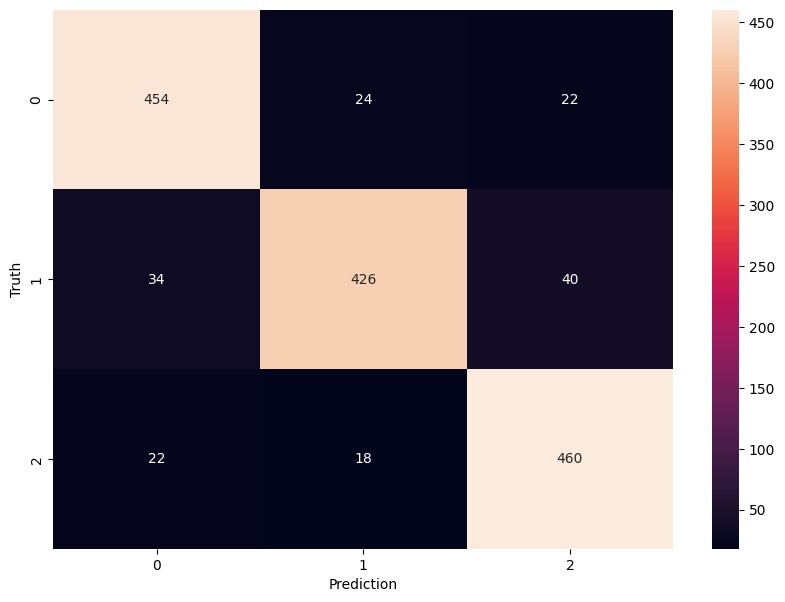

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')